## Early Stopping

### Basic Concepts

Before diving into Early Stopping, let's review some fundamental concepts:

**Overfitting:** This occurs when a model learns not only the patterns in the training data but also the noise. This leads to poor performance on new, unseen data.

**Regularization:** A set of techniques used to reduce overfitting by adding constraints or penalties to the model in order to improve its generalization ability.

### What is Early Stopping?

Early Stopping is a technique that halts the model training when performance on a validation set begins to degrade. The idea is to stop before the model starts overfitting to the training data.

### Is Early Stopping a Form of Regularization?

That's an interesting question! While Early Stopping doesn't add explicit penalties to the loss function like L1 or L2 regularization, it does control the model's effective complexity by limiting training time.

### Pros and Cons

**Pro:** Early Stopping prevents the model from continuing to learn specific patterns from the training data that do not generalize well, which aligns with the goal of regularization.

**Con:** It doesn't modify the cost function or directly add penalty terms like traditional regularization techniques.

### Therefore

Many experts consider Early Stopping a form of regularization because it helps prevent overfitting and improves the model's generalization ability.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# load dataset
digits = load_digits()
X = digits.data
y = digits.target

# split dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# split dataset into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

**Training without Early Stopping**

In [30]:
# model without early stopping
model_no_es = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
history_no_es = model_no_es.fit(X_train, y_train)

# Accurate validation score
val_pred_no_es = model_no_es.predict(X_val)
val_acc_no_es = accuracy_score(y_val, val_pred_no_es)
print(f"Accuracy validation without early stopping: {val_acc_no_es:.4f}")

Accuracy validation without early stopping: 0.9722


**Training with Early Stopping**

In [31]:
# model with early stopping
model_es = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42,
                         early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
history_es = model_es.fit(X_train_full, y_train_full)

# Accurate validation score
test_pred_es = model_es.predict(X_test)
test_acc_es = accuracy_score(y_test, test_pred_es)
print(f"Accuracy test with early stopping: {test_acc_es:.4f}")


Accuracy test with early stopping: 0.9583


**Results:**

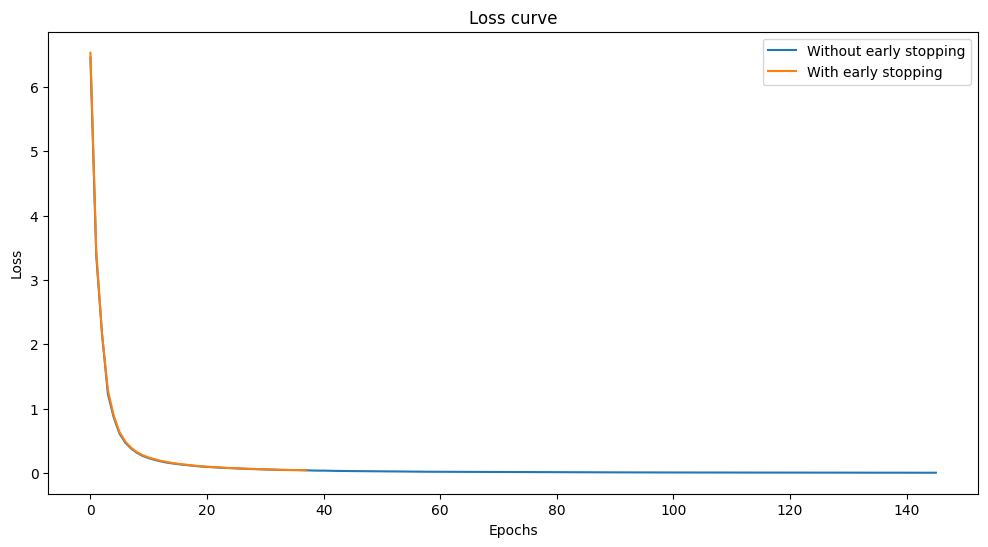

In [32]:
# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.plot(model_no_es.loss_curve_, label="Without early stopping")
plt.plot(model_es.loss_curve_, label="With early stopping")
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### In Detail

Early Stopping acts as a regularization technique by:

- Controlling the model's complexity  
- Stopping training before overfitting begins  

Although it's not a "classical" form of regularization, its goal and effect are similar to traditional regularization techniques.

### Benefits of Early Stopping

#### Prevention of Overfitting

- Improves model generalization  
- Helps strike a balance between bias and variance  

#### Reduced Training Time and Cost

- Saves computational resources  
- Increases energy efficiency  

#### Simplicity and Ease of Implementation

- Native support in many machine learning libraries  
- Fewer hyperparameters to tune  

#### Improved Model Stability

- More consistent results across different runs  
- Higher reproducibility  

#### Avoids Late Overfitting

- Continuous performance monitoring  
- Ensures sustainable performance on new data  

#### Applicability to Real and Complex Data

- Especially beneficial for larger and more complex datasets  
- Prepares the model to handle real-world problems  

#### Cost Savings in Cloud Environments

- Reduces costs on cloud computing services  
- Allows budget optimization  

#### Good Machine Learning Practices

- Follows the principle of parsimony  
- Promotes sustainable and efficient practices  

### Analysis of a Specific Example

Even though the model without Early Stopping achieved slightly higher test accuracy, it is important to consider:

- The accuracy difference may not be statistically significant  
- The digit dataset is relatively simple, reducing the likelihood of significant overfitting  
- On more complex datasets, overfitting is more likely without Early Stopping  
- Adjusting Early Stopping parameters may lead to different results  

### Summary

Although Early Stopping can sometimes result in slightly lower test accuracy, its benefits in terms of preventing overfitting, saving resources, and promoting good practices usually outweigh this drawback. In real-world contexts with larger and more complex datasets, Early Stopping is a valuable tool to ensure the model generalizes well to unseen data.

### References

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. Chapter 7: Regularization for Deep Learning.  
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.  
- Yao, Y., Rosasco, L., & Caponnetto, A. (2007). On Early Stopping in Gradient Descent Learning. *Constructive Approximation*, 26(2), 289–315.  
- Prechelt, L. (1998). Early Stopping — But When? In *Neural Networks: Tricks of the Trade* (pp. 55–69). Springer.  
- Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O’Reilly Media.  

### Observations

After analyzing the results of our experiment, we can highlight two key observations:

**Model without Early Stopping:**

- May continue training even after overfitting begins  
- Risk of learning noise patterns from the training data  

**Model with Early Stopping:**

- Stops training when validation performance stops improving  
- Helps prevent overfitting by halting training at the right moment  

These observations demonstrate how Early Stopping can be an effective tool to improve model generalization and prevent overfitting, working similarly to other regularization techniques.

### Conclusion

Early Stopping acts as a regularization technique by:

- Controlling the model's complexity  
- Stopping training before overfitting begins  

While it may not be a "classical" regularization method, its purpose and effect are similar to those of traditional techniques.
